# Interpolation and curve fitting

Գիտնականի աշխատանքի կարևոր մասն է առօրյա կյանքում կատարված դիտարկումներում և դրանց արդյունքում ստեղծված տվյալներում օրինաչափություններ գտնելը։ Python-ը տրամադրում է մի քանի գրադարաններ, որոնք օգնում են կատարել կանխատեսումներ՝ հիմնված իրական աշխարհի տվյալների վրա։ Թեև Python-ը կարող է կանխատեսումներ անել՝ հիմնվելով առկա տվյալների վրա, մարդու աչքը հավանաբար դեռևս լավագույն դատավորն է այն հարցում, թե արդյոք այդ կանխատեսումները տրամաբանական են, թե ոչ։

Դիտարկենք երկու չափողականություն ունեցող տվյալների հավաքածուից։ Օրինակ, մենք կարող ենք դիտարկել անցած դասի ընթացքում դուրս բերած ՀՀ-ում միջին աշխատավարձի փոփոխությունը եռամսյակների ընթացքում։ $x$ առանցքի վրա մենք կարող ենք նշել տարեթիվը, իսկ $y$ առանցքի վրա՝ աշխատավարձը։ Յուրաքանչյուր տարի կունենա համապատասխան ջերմաստիճան։

1-ին տվյալների կետը (data point) կլինի 0 կետը, 2-րդը՝ 1 կետը, և 3-րդը՝ 2 կետը, և այդպես շարունակ։ Վերջին տվյալների կետը  $N$-ն է։ Ընդհանուր առմամբ, կունենանք $N+1$ տվյալների կետեր։ Յուրաքանչյուր տվյալների կետի համար կունենանք տարեթիվ ($x$ արժեք) և աշխատավարձ ($y$ արժեք)։

Այս երկչափ տվյալների հավաքածուն մաթեմատիկորեն տրվում է հետևյալ բազմությամբ.

$$ (x_i, y_i),\quad i=0,\ldots,N,.$$

## Ինտերպոլացիա և կորի մոտարկում

Կորի մոտարկման և ինտերպոլյացիայի տերմինները հաճախ օգտագործվում են փոխարինաբար, նույն իմաստով, սակայն դրանք տարբեր են։ Թե՛ ինտերպոլյացիայի, և թե՛ կորի մոտարկման դեպքում մենք ենթադրում ենք, որ $x$ արժեքի և $y$ արժեքի միջև առկա է որոշակի կապ և գոյություն ունի ֆունկցիա, որը լավագույնս արտահայտում է այդ կապը։ Մեր խնդիրն է վերջավոր տվյալների կետերի միջոցով գտնել այդ ֆունկցիայի լավագույն մոտարկումը։ 

Մեր միջին աշխատավարձի օրինակում, որտեղ մենք պատկերում էինք միջին աշխատավարձը կախված եռամսյակից, մենք ձգտում ենք պատասխանել այն հարցին, թե արդյոք կա հարաբերություն միջին աշխատավարձի և եռամսյակի միջև։ Արդյո՞ք միջին աշխատավարձն աճել է ժամանակի ընթացքում, թե նվազել է։ Գուցե՞ միջին աշխատավարձը կապ չունի ժամանակի հետ։ Գուցե՞ մենք կորցրել ենք միջին աշխատավարձի տվյալները որոշ եռամսյակների համար, կարո՞ղ ենք արդյոք օգտագործել պահպանված տվյալները կորվածների մասին դատաղություններ կատարելու համար։

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid #0097a7; padding: 0px; border-radius: 5px;">
    <div style="padding: 10px; background: #0097a7; color: white">
        <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Կորի մոտարկում, թե՞ ինտերպոլացիա</b>
    </div>
    <div style="padding: 10px">
        <p>
            Թե՛ կորի մոտարկման, և թե՛ ինտերպոլյացիայի դեպքում ունենք որոշ դիսկրետ տվյալների կետեր։
        </p>
        <p>
            <strong>Ինտերպոլյացիայի</strong> դեպքում փնտրում ենք ֆունկցիա, որը <em>անցնում է բոլոր տվյալների կետերով</em>՝ անկախ նրանից, թե ինչպիսի տեսք կունենա ֆունկցիան վերջում։ Ինտերպոլյացիան սովորաբար օգտագործվում է, երբ կա մեծ վստահություն, որ տվյալներում <em>չափման սխալներ չկան</em>, և  $x$-ի $y$-ի հարաբերությունը <em>միարժեք է</em>, ինչը նշանակում է, որ չկան $y$-ի բազմակի արժեքներ մեկ $x$-ի համար։
        </p>
        <p>
            <strong>Կորի մոտարկման</strong> դեպքում պարզապես փնտրում ենք մի ֆունկցիա, որը լավագույնս համապատասխանում է բոլոր տվյալների կետերին, և <em>պարտադիր չէ</em>, որ այն <em>անցնի բոլոր տվյալների կետերով</em>։ Կորի մոտարկումը սովորաբար օգտագործվում է, երբ տվյալների կետերում կան <em>նշանակալի սխալներ</em>, և $x$-ը $y$-ի հարաբերությունը <em>միարժեք չԷ</em>։
        </p> 
    </div>
</div>

Կարող է թվալ, որ ինտերպոլյացիան ավելի լավ մեթոդ Է, քան կորի մոտարկումը, քանի որ այն անցնում է տվյալների բոլոր կետերով, սակայն պետք է նշել, որ իրականում տվյալները գրեթե միշտ պարունակում են չափման որևէ տեսակի սխալ։ Քանի որ ինտերպոլյացիան փորձում է հարմարեցնել բոլոր տվյալների կետերը, ինտերպոլյացիայի միջոցով ստացված ֆունկցիան կարող է կտրուկ փոփոխվել նույնիսկ տվյալների կետի աննշան փոփոխության դեպքում։ Կորի մոտարկամ մեթոդի դեպքում չենք ձգտում հարմարեցնել ֆունկցիան բոլոր տվյալների կետերին, որի շնորհիվ կտրուկ փոփոխություններ ֆունկցիայում չեն առաջանում տվյալների փոքր փոփոխությունների դեպքում։

Ինտերպոլյացիան ունի "inter" նախածանցը որը նշանակում է ներս կամ ներսում։ Ինտերպոլյացիայից ստացված ֆունկցիով կարող ենք ավելի ճշգրիտ կանխատեսումներ անել $y$ արժեքի մասին տրված տվյալների կետերի միջակայքում։ Օրինակ, եթե ունենք միջին աշխատավարձի տվյալներ յուրաքանչյուր երկրորդ եռամսյակի համար 2018 թ․ 1-ին եռամսյակից (2018 Q1, 2018 Q3, 2019 Q1, 2019 Q3, 2020 Q1, 2020 Q3, 2021 Q1, 2021 Q3, 2022 Q1, 2022 Q3, 2023 Q1, 2023 Q3, 2024 Q1), ապա ինտերպոլյացիան թույլ կտար մեզ կանխատեսումներ անել միջին աշխատավարձի տվյալների մասին տվյալների կետերի միջակայքում գտնվող մյուս եռամսյակների համար, այսինքն՝ 2018 Q1-ից մինչև 2024 Q4 ընկած ժամանակահատվածում, ներառյալ 2018 Q2, 2018 Q4, 2019 Q2, 2019 Q4, 2020 Q2, 2020 Q4, 2021 Q2, 2021 Q4, 2022 Q2, 2022 Q4, 2023 Q2, 2023 Q4։

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

## Ինտերպոլյացիա

### Մաթեմատիկական արտահայտություն

Ինչպես նշվել է նախկինում, ինտերպոլյացիան ձգտում է գտնել ֆունկցիա, որը կապ է հաստատում տվյալների կետերի $x$ և $y$ արժեքների միջև։ Հետևաբար, այդ ֆունկցիան բավարարում է հետևյալ արտահայտությանը ՝

$$y_i = f(x_i),\quad \forall i, \quad\text{[$\forall \equiv$ «կամայակամ»]},$$

որտեղ $f$ ֆունկցիան կոչվում է [ինտերպոլանտ](http://mathworld.wolfram.com/Interpolant.html)։

### Պարզ օրինակ
Ինտերպոլյացիայի ամենապարզ ձևը գծային ինտերպոլյացիան է։ Գծային ինտերպոլացիայի դեպքում, կետերը հերթականությամբ միացվում են ուղիղ գծերով և ստացվում է կտորային ֆունկցիա։

Դիտարկենք կամայական տվյալների բազմություն՝

$$\text{Dataset} = \{ (0.5, 0.5), (2.0, 0.4), (4.0, 0.3), (5.0, 0.1), (7.0, 0.9), (9.0, 0.8) \}.$$

Տվյալների հավաքածուի $x$ արժեքները և $y$ արժեքներն են՝

$$
\begin{align}
X = \{ 0.5, 2.0, 4.0, 5.0, 7.0, 9.0 \}, \\
Y = \{ 0.5, 0.4, 0.3, 0.1, 0.9, 0.8 \}.
\end{align}
$$

Գծային ինտերպոլյացիայի համար մենք սկսում ենք տվյալների հավաքածուի առաջին 2 կետերից, այնուհետև հաջորդ, և այսպես շարունակ։ Կետերի միացնող գծային կորի համար ունենք հետևյալ հավասարումը՝

$$y = mx + c,$$

որտեղ,

$$
\begin{align}
m = \frac{y_2 - y_1}{x_2 - x_1},\\
c = y_1 - mx_1 \\ 
\text{ կամ } c = y_2 - mx_2.
\end{align}
$$

Առաջին 2 կետերի համար տեղադրելով իրենց արժեքները՝ $(0.5, 0.5)$ և $(2.0, 0.4)$, ստանում ենք $m = -\frac{1}{15}$ և $c =\frac{8}{15}$։ $0.5<x<2.0$ միջակայքի համար ֆունկցիան կարող է գրվել որպես՝

$$f(x) = -\frac{1}{15}x + \frac{8}{15},\quad 0.5<x<2.0.$$

Հաջորդ 2 կետերի համար $(2.0, 0.4)$ և $(4.0, 0.3)$ կրկնելով նույն գործողությունները ստանում ենք $m = -\frac{1}{20}$ և $c =\frac{1}{2}$։ $2.0<x<4.0$ միջակայքի համար ֆունկցիան կարող է գրվել որպես՝

$$f(x) = -\frac{1}{20}x + \frac{1}{2},\quad 2.0<x<4.0.$$

Միավորել այս երկու մասնակի ֆունկցիաները կստանանք՝

$$
  f(x) =
  \left\{\begin{array}
    -\frac{1}{15}x + \frac{8}{15}, \quad 0.5<x<2.0 \\
    -\frac{1}{20}x + \frac{1}{2}, \quad 2.0<x<4.0
  \end{array}\right\}.
$$

Շարունակելով վերոհիշյալ գործընթացը մնացած կետերի համար ի վերջո կստանանք կտորային գծային ֆունկցիա՝

$$
  f(x) =
  \left\{\begin{array}
    -\frac{1}{15}x + \frac{8}{15},\quad 0.5<x<2.0 \\
    -\frac{1}{20}x + \frac{1}{2},\quad 2.0<x<4.0 \\
    \quad\quad\cdots
  \end{array}\right\}.
$$

Գրենք ծրագիր որը կհաշվի $m$ և $c$ գործակիցները նշված տվյալների հավաքածուի կետերի համար։

In [2]:
x = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

m_list = np.zeros(len(x))
c_list = np.zeros(len(x))

for i in range(len(x)-1):
    m = (y[i+1]-y[i])/(x[i+1]-x[i])
    c1 = (y[i]-m*x[i])
    c2 = (y[i+1]-m*x[i+1])

    print("For (%.1f, %.1f) and (%.1f, %.1f), m = %.2f and c1 = %.2f, c2 = %.2f."
             % (x[i], y[i], x[i+1], y[i+1], m, c1, c2))
    
    m_list[i] = m
    c_list[i] = c1

For (0.5, 0.5) and (2.0, 0.4), m = -0.07 and c1 = 0.53, c2 = 0.53.
For (2.0, 0.4) and (4.0, 0.3), m = -0.05 and c1 = 0.50, c2 = 0.50.
For (4.0, 0.3) and (5.0, 0.1), m = -0.20 and c1 = 1.10, c2 = 1.10.
For (5.0, 0.1) and (7.0, 0.9), m = 0.40 and c1 = -1.90, c2 = -1.90.
For (7.0, 0.9) and (9.0, 0.8), m = -0.05 and c1 = 1.25, c2 = 1.25.


Կտորային գծային ինտերպոլյացիան հեշտությամբ կարող է իրականացվել Python-ում։ Նախ սկսենք կետերը առանձին պատկերելով։ Օգտագործենք նախորդ դասում աշխատավարձի համար ստացված տվյալները։

In [3]:
quarters = [''] + pd.date_range("20180101", "20240601", freq="QS").tolist()
df = pd.read_excel("data/arm-salaries.xlsx", sheet_name=0, header=None, usecols="C,E:AD", index_col=0, skiprows=7, skipfooter=6, names=quarters)
df = df.transpose()

Վերածենք ամսաթվերը սովորական թվերի, դրանց հետ հեշտությամբ աշխատելու համար։

In [4]:
tsList = df.index.to_list()
initialTime = tsList[0].timestamp()
maxTime = tsList[len(tsList)-1].timestamp()
df.index = list(map(lambda ts: (ts.timestamp() - initialTime) * 100/maxTime, df.index.to_list()))
df.index.to_list()

[0.0,
 0.4542242858584839,
 0.9134955082265065,
 1.377813667104068,
 1.842131825981629,
 2.296356111840113,
 2.755627334208136,
 3.2199454930856968,
 3.684263651963258,
 4.143534874331281,
 4.602806096699304,
 5.067124255576865,
 5.5314424144544265,
 5.98566670031291,
 6.444937922680933,
 6.909256081558494,
 7.373574240436056,
 7.827798526294539,
 8.287069748662562,
 8.751387907540122,
 9.215706066417685,
 9.669930352276168,
 10.12920157464419,
 10.593519733521752,
 11.057837892399313,
 11.517109114767337]

In [5]:
# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
def plot_raw_data(x, y, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(x, y, 'ko', label='raw data')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)

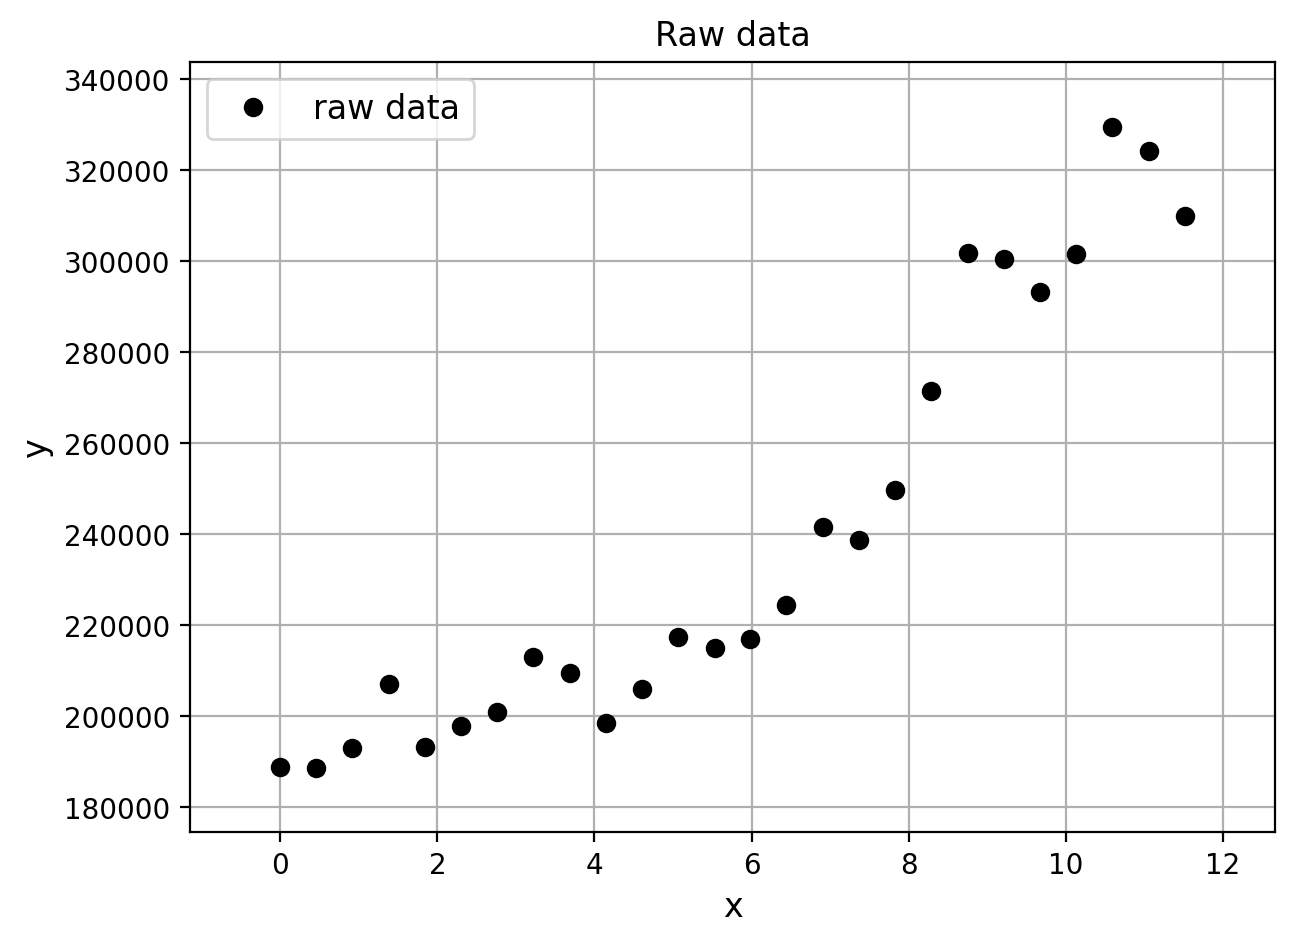

In [6]:
# Set up a figure
x = np.array(df.index.to_list())
y = np.array(df['Yerevan city'].to_list())

fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Overlay raw data
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Raw data', fontsize=12)

plt.show()

Այժմ եկեք պատկերենք կտորային գծային ֆունկցիան։ Մենք կօգտագործենք նախորդիվ սահմանված ֆունկցիան, այնպես որ համոզվեք, որ վերևի բջիջը գործարկել եք, որպեսզի ֆունկցիան բեռնված լինի։

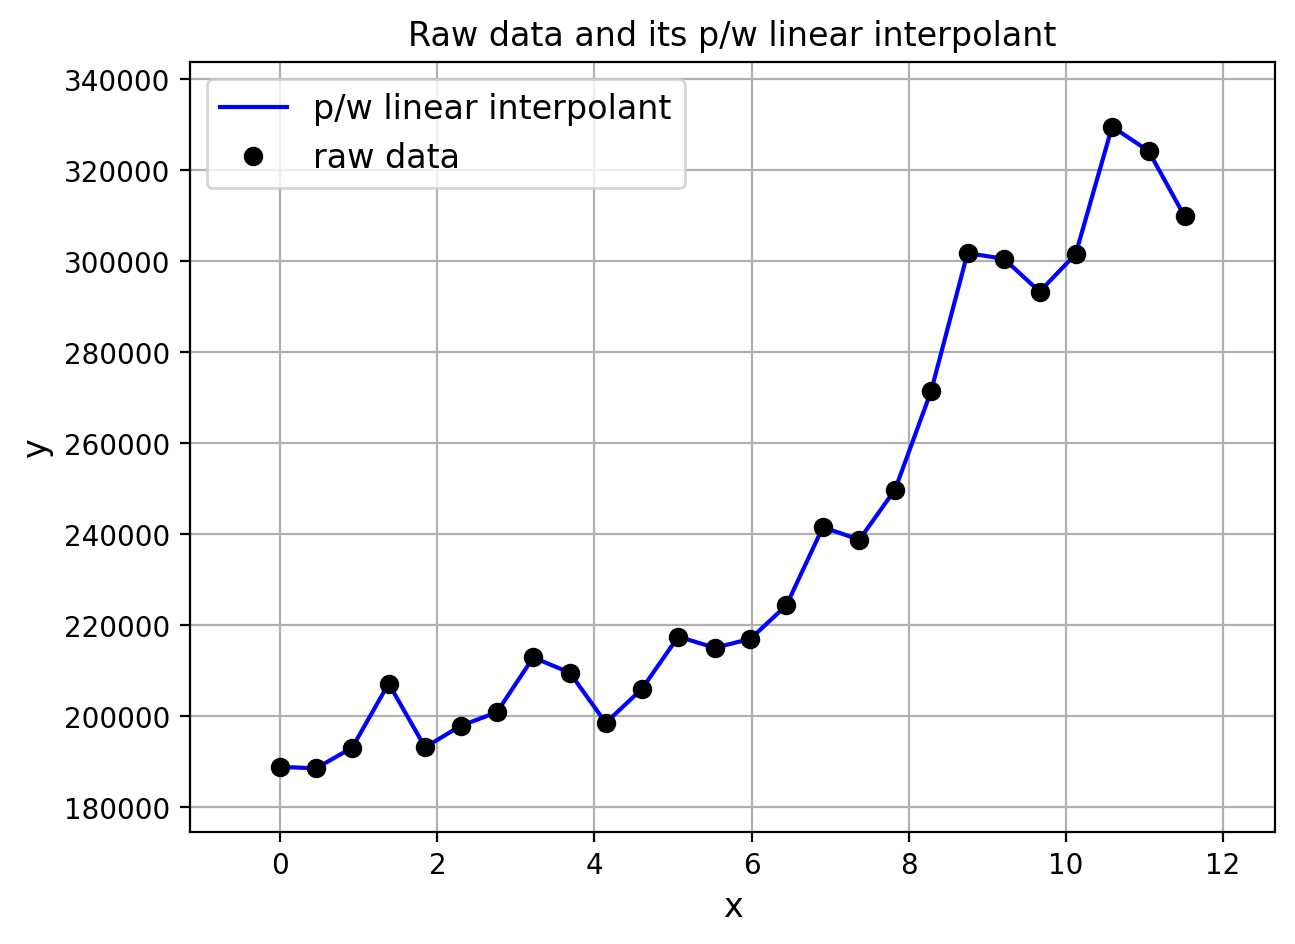

In [7]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot a piecewise-linear approximation.
# We get this simply by connecting the points with straight lines
# and this is the default behaviour of the plotting routine
ax1.plot(x, y, 'b', label='p/w linear interpolant')

# The previous raw data is overlain using the previous function
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Raw data and its p/w linear interpolant', fontsize=12)

plt.show()

## Բազմանդամային ինտերպոլյացիա

Ենթադրենք մեզ տրված է $N+1$ տվյալների կետեր $(x_i, y_i)$ (տարբեր $x_i$-երով)։

Այժմ ենթադրենք, մենք կառուցում ենք $N$ աստիճանի բազմանդամ՝

$$ P_N(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots a_N x^N,$$

որտեղ $a_0, \, a_1, \, \ldots, \, a_N$-ը մեր բազմանդամի գործակիցներն են։

Նկատենք, որ մենք ունենք այս գործակիցներից $N+1$ հատ՝ $N$ աստիճանի բազմանդամի համար։ Ազատ պարամետրերի ($N+1$) այս քանակի ճշգրիտ համապատասխանությունը տվյալների կետերի քանակին ($N+1$) կարևոր է, քանի որ դա հենց այն ճիշտ քանակն է, որը թույլ է տալիս մեզ միարժեքորեն որոշել գործակիցները։

Այս բազմանդամի գործակիցները գտնելու համար անհրաժեշտ է լուծել $N+1$ գծորեն անկախ հավասարում.

$$
\begin{align}
a_0 + a_1 x_0 + a_2 x_0^2 + a_3 x_0^3 + \ldots a_N x_0^N = y_0 \\
a_0 + a_1 x_1 + a_2 x_1^2 + a_3 x_1^3 + \ldots a_N x_1^N = y_1 \\
\ldots \\
a_0 + a_1 x_n + a_2 x_n^2 + a_3 x_n^3 + \ldots a_N x_n^N = y_n
\end{align}
$$

ինչը կարելի է ներկայացնել մատրիցական տեսքով

$$
\hat{M} \vec{a} = \vec{Y}
$$
$$
\begin{pmatrix}
1 & x_0 & x_0^2 & x_0^3 & \ldots & x_0^N \\
1 & x_1 & x_1^2 & x_1^3 & \ldots & x_1^N \\
\ldots & \ldots & \ldots &\ldots & \ldots \\
1 & x_N & x_N^2 & x_N^3 & \ldots & x_N^N \\
\end{pmatrix}
\begin{pmatrix}
a_0 \\ a_1 \\ a_2 \\ a_3 \\ \ldots \\ a_N
\end{pmatrix} =
\begin{pmatrix}
y_0 \\ y_1 \\ y_2 \\ y_3 \\ \ldots \\ y_N
\end{pmatrix}
$$

Այս հավասարումից $a_i$ գործակիցները գտենլու համաՐ պետք է հաշվել $\hat{M}^{-1}$ մատրիցը։

$$
\vec{a} = \hat{M}^{-1} \vec{y}
$$

$\hat{M}^{-1}$ մատրիցի հաշվարկը մեծ թվով գործակիցների դեպքում դժվար խնդիր է։ Հարց է առաջանում, կա՞ արդյոք ավելի հեշտ տարբերակ բազմանդամ կառուցելու, որը անցնում է տվյալների կետերով։

## Լագրանժի բազմանդամներ

Պատասխանը այո է, և [Լագրանժի բազմանդամները](https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) հատկապես սիրված ընտրություն են տվյալների հավաքածուի համար ինտերպոլանտ կառուցելու համար։

Տրված $(N+1)$ կետերի հավաքածուի համար, Լագրանժի բազմանդամը սահմանվում է հետևյալ կերպ

$$L(x) = \sum_{i=0}^{N} y_i \ell_i(x),$$

որտեղ $\ell_i(x)$-երը մեր բազիսային ֆունկցիաների նոր ընտրություն են, իսկ $y_i$-երը $N+1$ գործակիցներն են, որոնք համապատասխանում են այս բազիսին։

Այս մոտեցման ամբողջ իմաստն այն է, որ մենք այլևս պետք չէ հաշվարկենք կշիռները՝ շրջելով մատրիցային համակարգը, ինչպես պետք էր անել վերևում։

Այս մոտեցման շրջանակներում, գործակիցները ուղղակիորեն կարելի ստանալ տվյալներից։

$$\ell_i(x)$$ ֆունկցիաները հայտնի են որպես Լագրանժի բազիսային բազմանդամներ և տրվում են հետևյալ արտադրյալով

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

որտեղ $0\le i\le N$.

Բոլոր $j\neq i$ համար, $\ell_j(x)$ ֆունկցիան համարիչում ունի $(x-x_i)$ անդամը, այնպես, որ ամբողջ արտադրյալը հավասար Է 0-ի $x=x_i$ կետում:

$$\ell_{j\ne i}(x_i) =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}}
 \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.$$

Մյուս կողմից, $\ell_i(x)$ ինդեքսով ֆունկցիան $x_i$ կետում հավասար է 1-ի:

$$\ell_i(x_i) = 
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
\frac{x_i-x_m}{x_i-x_m} = 1.$$

Սրանից հետևում է

$$y_i \ell_i(x_i)=y_i,$$

և հետևաբար բոլոր $x_i$ կետերում

$$L(x_i)=0+0+\dots + y_i + 0 +\ldots +0=y_i$$

Այսպիսով ցույց տվեցինք, որ $L$ ֆունկցիան իրոք ճշգրտորեն ինտերպոլացնում է մեր տվյալները։

Նշենք, որ մենք կարող ենք օգտագործել SciPy գրադարանը՝ Լագրանժի բազիսային ֆունկցիանները և բազմանդամը գնահատելու համար։

Ավելի կոնկրետ կօգտագործենք [`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html) ֆունկցիան՝ տվյալների հավաքածուի համար Լագրանժի բազմանդամը ստանալու համար։

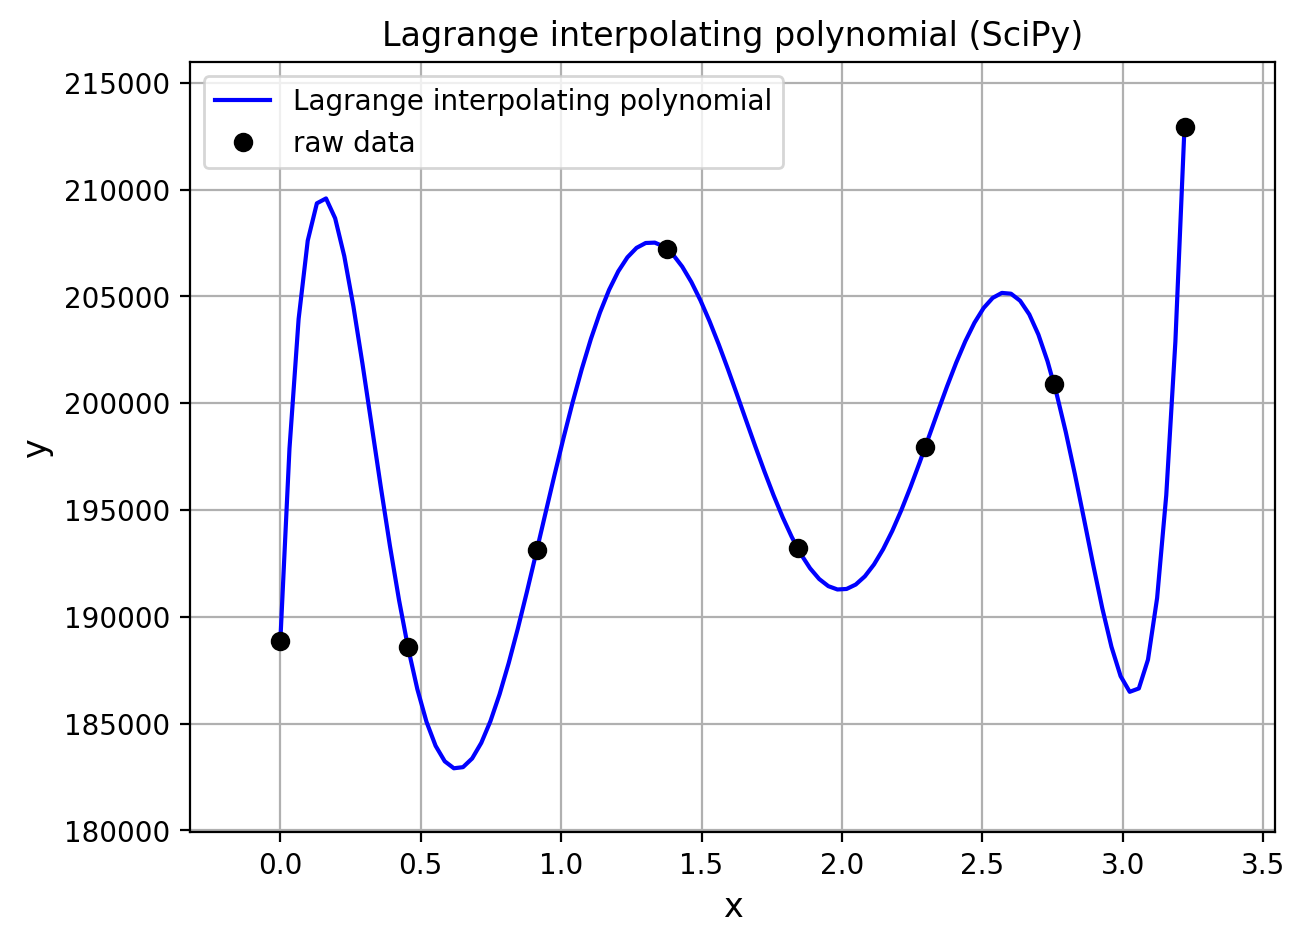

In [8]:
import scipy.interpolate as si

dataPointCount = 8
xi = x[:dataPointCount]
yi = y[:dataPointCount]

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# above we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
z = np.linspace(x[0], x[dataPointCount-1], 100)

# set up the figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(z, lp(z), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)')

# Add a legend
ax1.legend()

plt.show()

## Newton polynomial
Calculating the Newton polynomial (also called [Newton's divided difference interpolation polynomial](https://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html)) yields the same polynomial as the Lagrange polynomial method (remember that the polynomial of minimum degree to pass through each data point is unique), but is arguably easier to implement.

To derive this approach we write our degree $N$ polynomial in the following form

$$
\begin{align}
P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N 
\end{align}
$$

where $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the $N+1$ pieces of information we have in the given data.

Efficient derivation of an algorithm to compute the Newton polynomial follows from noticing that we can write this polynomial in a [recursive form](https://en.wikipedia.org/wiki/Recursion_(computer_science)).

Consider for example a case with $N=3$:

$$
\begin{align}
P_3(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3,\\
P_3(x)= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]]
\end{align}
$$

Notice that substituting in the $x_i$ values leads to a set of simultaneous equations where we can easily evaluate the unknowns $a_0, a_1, \ldots$ using 'back (or forward) substitution'.

1. Substitute $x=x_0$: We have $a_0 = P_3(x_0)$, and we know that our interpolant $P_3(x)$ evaluated at $x_0$ must return $y_0$. Hence,

$$a_0 = y_0.$$

2. Now substitute $x=x_1$. We have $P_3(x_1) = a_0 +(x_1-x_0)a_1 = y_0 +(x_1-x_0)a_1$, the LHS of this is $y_1$, and we know everything on the RHS as we have already calculated $a_0 = y_0$. We can thus trivially rearrange to yield
    
    $$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$

2. Substituting $x=x_2$ yields


$$
\begin{align}
   y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right],\\
\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}.
\end{align}
$$

4. And so on.

To define an algorithm for this method in general let's first introducing the following [divided difference notation](https://en.wikipedia.org/wiki/Divided_differences):

$$
\begin{align}
\Delta y_i = \frac{y_i-y_0}{x_i-x_0},\quad i=1,2,\ldots, N,\\
\Delta^2 y_i = \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\quad i=2, 3,\ldots, N,\\
\vdots\\
\Delta^N y_N = \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}.
\end{align}
$$

With a bit of thought we can hopefully see from the above example that the coefficients of the interpolating polynomial in the general case are given by

$$a_0=y_0,\quad a_1 = \Delta y_1, \quad a_2 = \Delta^2 y_2, \quad \ldots \quad a_N = \Delta^N y_N.$$

Our own code below shows how to calculate Newton polynomial coefficients.

In [9]:
# Consider the above example data again
# xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
# yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])


def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    # Initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # We have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])

    return a


# Given the coefficients a, and the data locations xi,
# define a function to evaluate the Newton polynomial
# at locations given in the array x.
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this section.

def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at x
    P = a[N]
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P
    return P

And now we can plot the result:

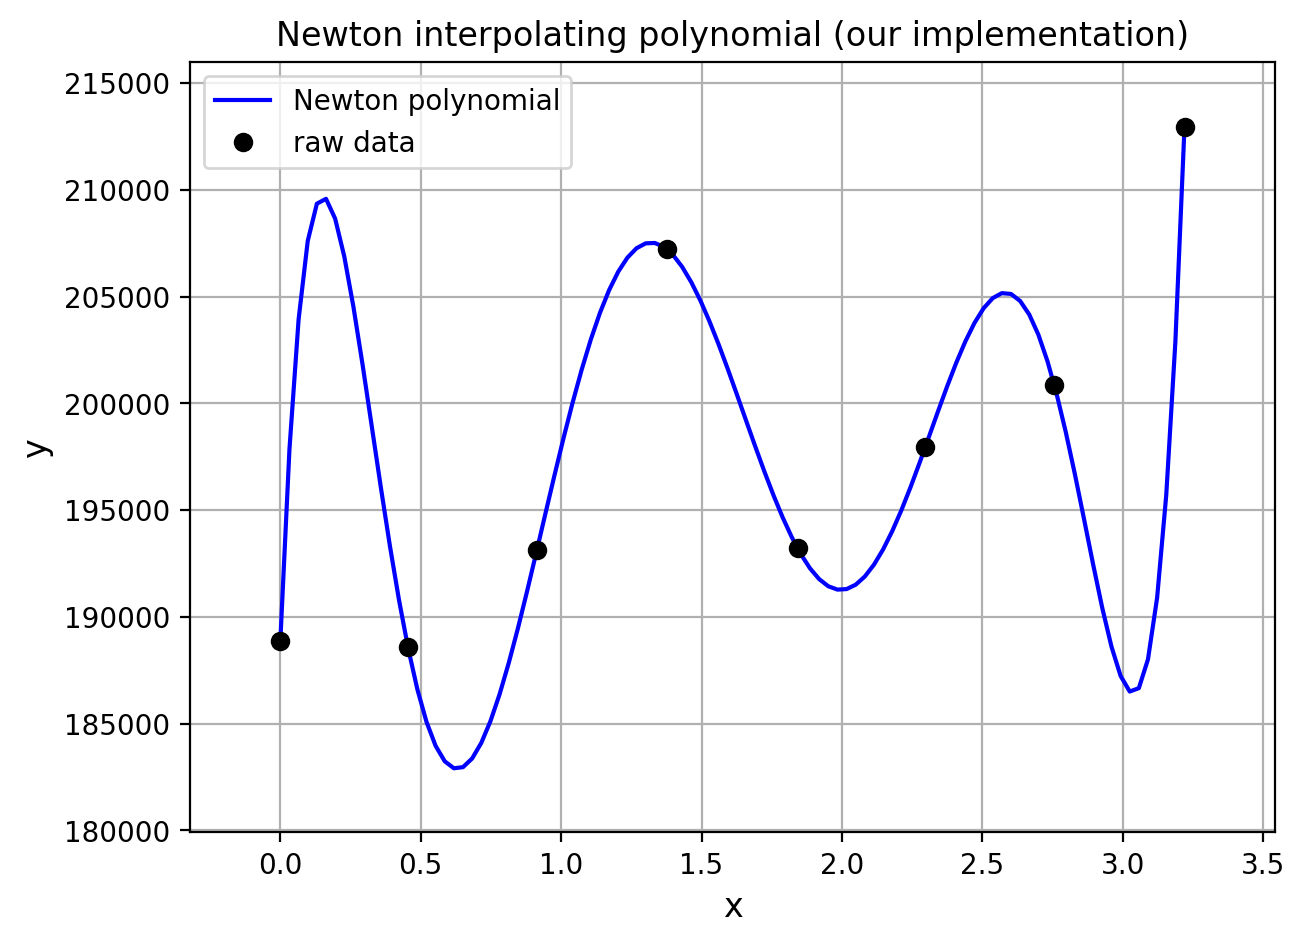

In [10]:
# set up figure
dataPointCount = 8
xi = x[:dataPointCount]
yi = y[:dataPointCount]

fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
z = np.linspace(xi[0], x[dataPointCount-1], 100)
ax1.plot(z, eval_newton_poly(a, xi, z), 'b', label='Newton polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)')

# Add a legend
ax1.legend()

plt.show()

## Curve fitting

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid #0097a7; padding: 0px; border-radius: 5px;">
    <div style="padding: 10px; background: #0097a7; color: white">
        <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Օգտակար տեղեկություն</b>
    </div>
    <div style="padding: 10px">
        <p>
            Note that curve fitting is related to the topic of regression analysis. <a href="https://en.wikipedia.org/wiki/Least_squares">Least squares approximation</a> used in linear regression is a method of minimising the sum of the squares of the differences between the prediction and real data. Fitting a polynomial to data in a least squares sense is an example of what can be termed polynomial regression.
        </p>
    </div>
</div>

In [curve fitting](https://en.wikipedia.org/wiki/Curve_fitting), we want to find a function that approximates the data in some sense, but does not go through all the point. In this case we no longer have the requirement that

$$x_0 < x_1 < \ldots < x_N,$$

and can consider the data simply as a cloud of points.

This is the most typical case for real world data which contains variability and noise and could additionally give rise to multiple different measurements (i.e. $y$ values) at the same $x$ location. With real data this fitting of data to a function often has the effect of smoothing complex or noisy data.

### Polynomial curve fitting

Imagine having several points on a graph, and you want a curve that could go through all these points. The curve could be described through a mathematical function that could create a curve. Remember that straight lines could be considered a special case of a curve, much like how in topology, the square is a special case of a rectangle, and a rectangle is a special case of a parallelogram, and parallelogram a special case of a quadrilateral. One of the mathematical function that could create curves is a polynominal function.

A first degree polynomial function is basically a straight line, and is written in the form of:

$$ y = mx + c \text{.}$$

A second degree polynominal function is basically a curve with a single bend, and is written in the form of:

$$ y = ax^2 + bx + c \text{.}$$

A 3 degree polynominal function is a curve with two bends, and is written in the form of:

$$ y = ax^3 + bx^2 + cx + d \text{.}$$

Thus, a polynominal function of $n$ degree is a curve with $n-1$ bends.

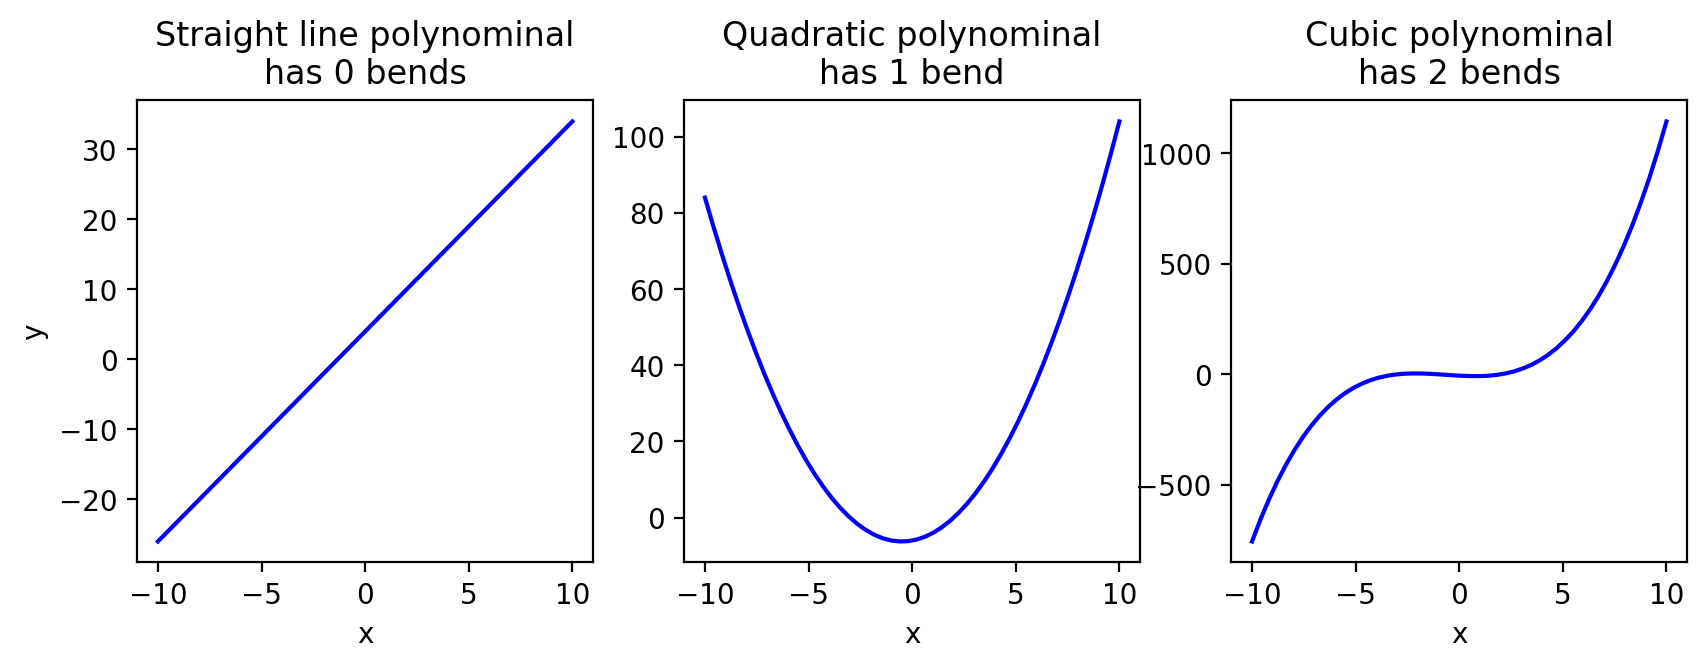

In [11]:
# A snippet to showing polynominal degree and number of bends

def poly_plot(xmin, xmax, number_of_points, a, b, c, d, ax):
    xi = np.linspace(xmin, xmax)
    yi = a*xi**3 + b*xi**2 + c*xi + d
    ax.plot(xi, yi, color="blue")
    ax.set_xlabel("x")
    
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
ax1 = axes[0] 
ax2 = axes[1]
ax3 = axes[2]

poly_plot(-10, 10, 100, 0, 0, 3, 4, ax1)
ax1.set_title("Straight line polynominal\nhas 0 bends")

poly_plot(-10, 10, 100, 0, 1, 1, -6, ax2)
ax2.set_title("Quadratic polynominal\nhas 1 bend")

poly_plot(-10, 10, 100, 1, 2, -5, -6, ax3)
ax3.set_title("Cubic polynominal\nhas 2 bends")

ax1.set_ylabel("y")

plt.show()

### Simple example

While we could just use the default plotting method to demonstrate linear interpolation, to demonstrate linear curve-fitting we need to do a bit more work.

The example below demonstrates how we can use `numpy.polyfit` to do this for us. The documentation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
```{admonition} Least squares polynomial fit

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
```

`numpy.polyfit` returns the coefficients of the polynomial fit to the data. We can then use `numpy.poly1d` to turn this into a function we can easily evaluate, as seen in the next example.

In [12]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (x, y) data from above
degree = 1
poly_coeffs = np.polyfit(x, y, degree)
print('poly_coeffs: ',poly_coeffs)

# Use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

poly_coeffs:  [ 12496.37895291 167831.18764672]


We can plot the raw data and the linear fit:

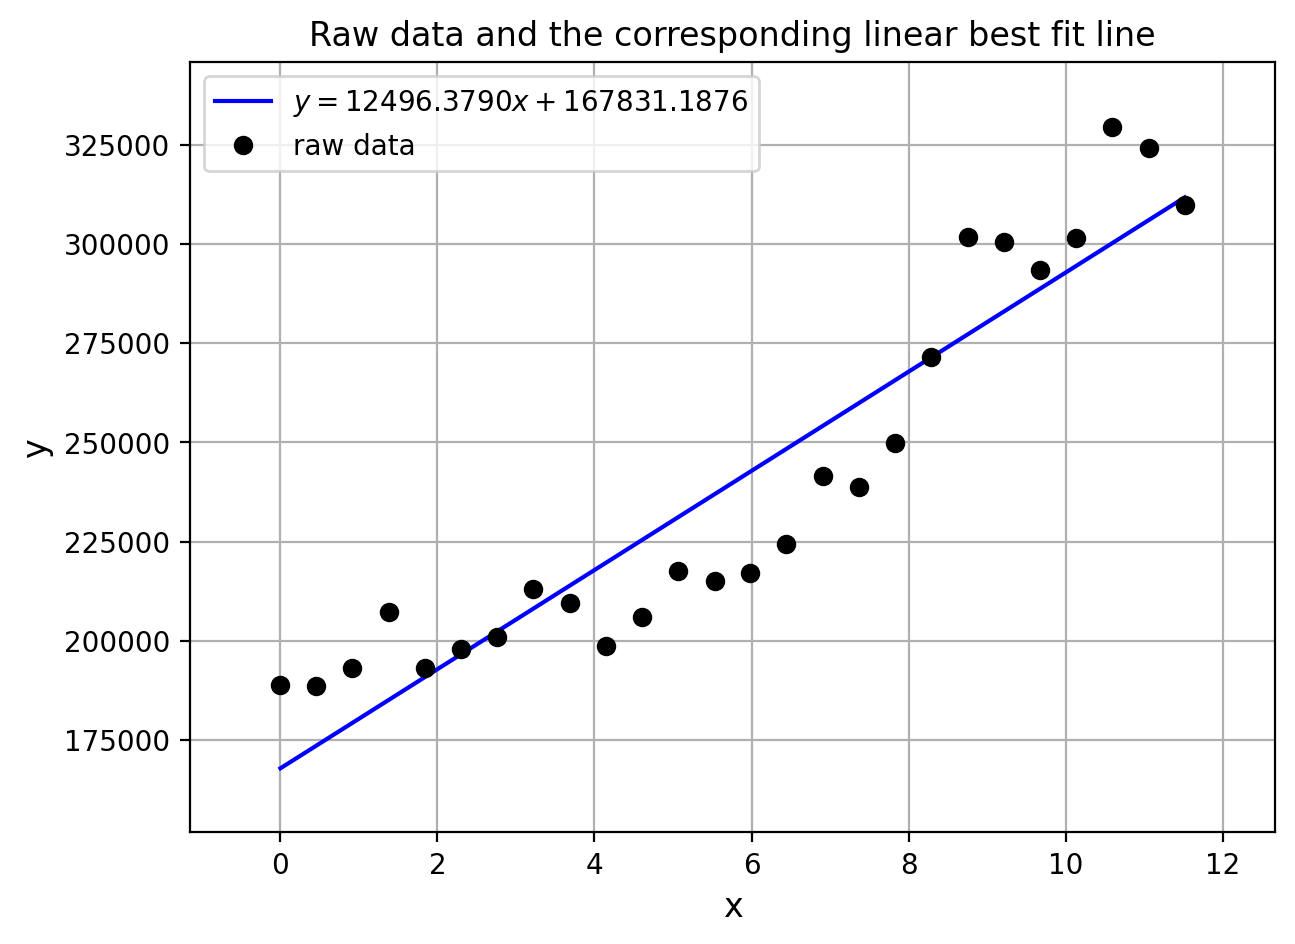

In [13]:
# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
z = np.linspace(x[0], x[len(x)-1], 100)
ax1.plot(z, p1(z), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], 
                                                                 poly_coeffs[1]))

# Overlay raw data
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend()

# Add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line')

plt.show()

A curve that goes through multiple points will have to bend and twist itself so that it goes through these points. Therefore, a curve with a higher polynominal degree, and thus a larger number of bends, will be able to bend and twist itself to better fit the points.

In [22]:
eramsyak = 0.4542242858584839
p2(x[len(x)-1])

np.float64(336663.3787695123)

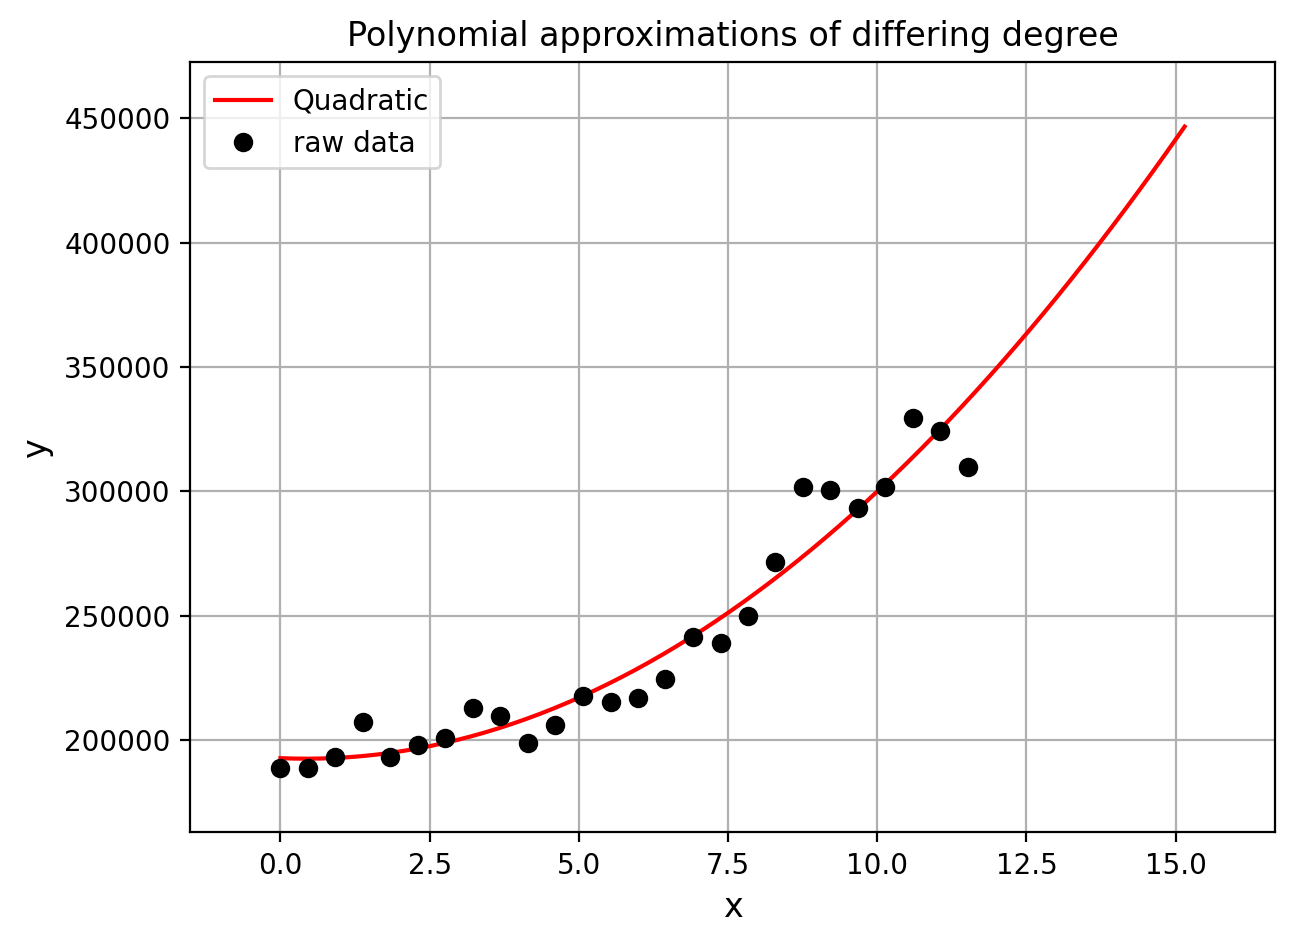

In [23]:
# Consider the above example data again
xi = x
yi = y

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

z = np.linspace(x[0], x[len(x)-1]+8*eramsyak, 200)

#ax1.plot(z, p0(z), 'k', label='Constant')
# ax1.plot(z, p1(z), 'b', label='Linear')
ax1.plot(z, p2(z), 'r', label='Quadratic')
# ax1.plot(z, p3(z), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(x, y, ax1)

ax1.legend()
ax1.set_title('Polynomial approximations of differing degree')

plt.show()

### Squared error calculation

As described in the docs ([`numpy.polyfit`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation, i.e. it minimises the expression

$$E = \sum_{i=0}^{N} (P(x_i) - y_i)^2,$$

where $P(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" width="300px"></p>

Source: [Wikipedia](https://en.wikipedia.org/wiki/Linear_least_squares)

Let's write a function that evualuates the squared error and use it to evaluate error for each of the polynomials calculated above.

In [ ]:
# We use the square of the difference to ensure each contribution
# to the total error is positive, otherwise errors of different signs
# could/would cancel out giving a false estimate of how good our approximation is


def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()


print("Constant fit error = ", sqr_error(p0, xi, yi))
print("Linear fit error = ", sqr_error(p1, xi, yi))
print("Quadratic fit error = ", sqr_error(p2, xi, yi))
print("Cubic fit error = ", sqr_error(p3, xi, yi))

(nm_extrapolation)=
## Extrapolation

Interpolation by definition is used to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,9]$) with some confidence. **Extrapolation** on the other hand is the process of estimating (e.g. using the interpolating function) $y$ outside the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

We can recreate the plots for different degrees of polynomial, setting x-range from -2 to 11.0 to see how extrapolation changes the result.

In [ ]:
# Xonsider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

# Plot over a couple of different x ranges
x1 = np.linspace(-2., 11., 100)
x2 = np.linspace(0., 9.5, 100)

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x1, p(x1), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax1)
# Add a legend
ax1.legend(loc='best')
ax1.set_title('Extrapolation example - wider interval', fontsize=14)

# NB. if you set the limits of the x data to numpy.linspace(0., 9.5, 100)
# and replot this will result in you zooming in on the data to better see
# how each polynomial fits the data, but less clearly shows the major
# problem with extrapolation.

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax2.plot(x2, p(x2), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax2)
# Add a legend
ax2.legend(loc='best')
ax2.set_title('Extrapolation example - narrower interval', fontsize=14)

plt.show()